# Iowa House Prices

*Based on __[this tutorial](https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda/report)__.*

## 1. Import Libraries and Data

In [135]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
train_df = pd.read_csv("train.csv")
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
test_df = pd.read_csv("test.csv")
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [138]:
test_df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [139]:
train_df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [140]:
train_df = train_df.drop('Id',axis=1)
test_ids = test_df['Id']
test_df = test_df.drop('Id',axis=1)

In [141]:
train_df.shape

(1460, 80)

In [142]:
test_df.shape

(1459, 79)

In [143]:
full_df = train_df
full_df = full_df.append(test_df)

In [144]:
full_df.shape

(2919, 80)

## 2. Explore Data

### 2.1 Response variable, SalePrice

C:\Users\rianashwin\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rianashwin\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


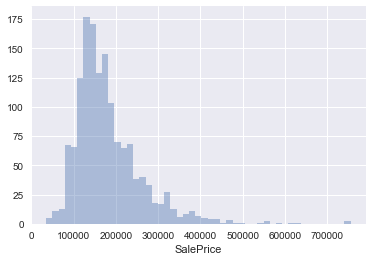

In [145]:
sns.distplot(train_df['SalePrice'], kde=False)

SalePrice appears to be skewed to the right. This makes sense - fewer people would buy expensive homes.

### 2.2 Most important numeric predictors

Char columns need cleansing before we can use them. In the meantime, let's study correlations of numeric variables.

#### 2.2.1 Corelations with SalePrice

In [146]:
num_full_df = full_df.select_dtypes(exclude=['object'])
num_full_df.shape

(2919, 37)

37 numeric columns.

In [147]:
correls = num_full_df.corr(method='pearson')
correls['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Let's visualize the relation between SalePrice and the two predictors with the highest correlation with SalePrice; Overall Quality and the ‘Above Grade’ Living Area (this is the proportion of the house that is not in a basement).

#### 2.2.2 OverallQual

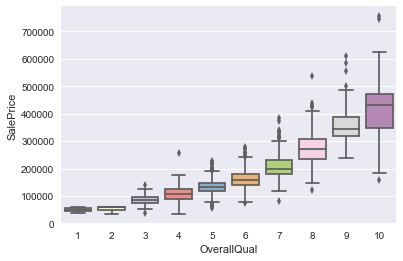

In [148]:
ax = sns.boxplot(x="OverallQual", y="SalePrice",data=num_full_df, palette="Set3")
plt.show()

From the above, the positive correlation is clear. There may be an outlier at OverallQual = 4; this may be a candidate for removal.

#### 2.2.3 GrLivArea

C:\Users\rianashwin\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


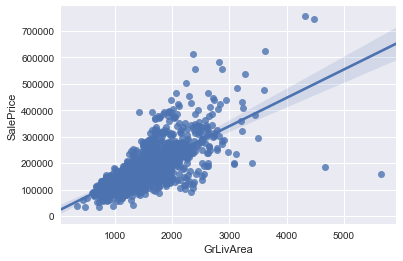

In [149]:
#ax = sns.scatterplot(x="GrLivArea", y="SalePrice",data=num_full_df)
sns.regplot(x=num_full_df["GrLivArea"], y=num_full_df["SalePrice"], fit_reg=True)

From the above, there appear to be two houses which have high above ground sq footage but low prices. Let's look at them further:

In [150]:
num_full_df[["GrLivArea","OverallQual","SalePrice"]][(num_full_df["GrLivArea"]>4000) & (num_full_df["SalePrice"]<200000)]

,GrLivArea,OverallQual,SalePrice
523,4676,10,184750.0
1298,5642,10,160000.0


These two houses appear to have scored the max for overallqual. there must be something else which has brought their sale price down. These two seem likely to be prime candidates as outliers, and we need to consider removing them.

## 3. Missing values, label encoding and factorising variables

In [151]:
#full_df.columns.tolist()
full_df.isnull().sum()[full_df.isnull().sum()>0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

In [152]:
print("There are {} columns with missing values".format(len(full_df.isnull().sum()[full_df.isnull().sum()>0])))

There are 35 columns with missing values


In [153]:
len(test_df)

1459

SalePrice is missing for all test examples. Therefore, we need to look 34 columns.

### 3.1 Impute missing data

#### 3.1.1 PoolQC and PoolArea

PoolQC has the highest NA's, and is described as follows:

       PoolQC: Pool quality
       
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
Let's assign our missing values as NA. It makes sense that we have a a higher number of missing values, only a small number of houses should have swimming pools.

In [154]:
len(full_df['PoolQC'][full_df['PoolQC'].isnull()])

2909

In [155]:
full_df['PoolQC'] = full_df.apply(lambda row: 'None' if pd.isnull(row['PoolQC'])==True else row['PoolQC'], axis=1)

In [156]:
len(full_df['PoolQC'][full_df['PoolQC'].isnull()])

0

In [157]:
full_df['PoolQC'].value_counts()

None    2909
Gd         4
Ex         4
Fa         2
Name: PoolQC, dtype: int64

In fact, since this column is ordinal, we can replace with values 0 to 4 as follows:

In [158]:
full_df['PoolQC']= full_df['PoolQC'].map({'None':0,
                                          'Fa':1,
                                          'TA':2,
                                          'Gd':3,
                                          'Ex':4}) 

In [159]:
full_df['PoolQC'].value_counts()

0    2909
3       4
4       4
1       2
Name: PoolQC, dtype: int64

However, there is another variable which relates to swimming pools, ie PoolArea, which is the pool area in square feet. There appears to be houses which have values for pool area but no PoolQC values:

In [160]:
full_df[['PoolQC','PoolArea','OverallQual']][(full_df['PoolQC']==0) & (full_df['PoolArea']>0)]

,PoolQC,PoolArea,OverallQual
960,0,368,4
1043,0,444,6
1139,0,561,3


Let's just go ahead and impute OverallQual values:

In [161]:
full_df.OverallQual.value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

In [162]:
full_df.at[960,'PoolQC'] = round(full_df.iloc[960].OverallQual/10 * 4)
full_df.iloc[960].PoolQC

2

In [163]:
full_df.at[1043,'PoolQC'] = round(full_df.iloc[1043].OverallQual/10 * 4)
full_df.iloc[1043].PoolQC

3

In [164]:
full_df.at[1139,'PoolQC'] = round(full_df.iloc[1139].OverallQual/10 * 4)
full_df.iloc[1139].PoolQC

2

#### 3.1.2 MiscFeature

This does not appear to be ordinal
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

NA      2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

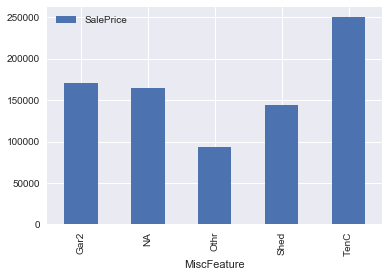

In [165]:
full_df['MiscFeature'] = full_df['MiscFeature'].fillna('NA')
full_df['MiscFeature'] = full_df['MiscFeature'].astype('category')
full_df['MiscFeature'].dtypes
full_df[['SalePrice','MiscFeature']].groupby(['MiscFeature']).median().plot.bar()
full_df['MiscFeature'].value_counts()

From the above, while it seems as though having a tennis court drives up the price of houses, do note that only 1 house as a tennis court.

#### 3.1.3 Alley

This does not appear to be ordinal
		
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

NA      2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

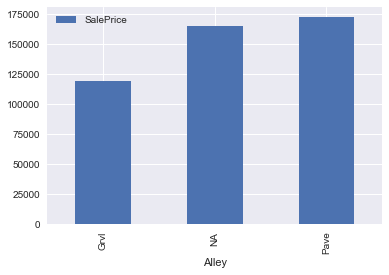

In [166]:
full_df['Alley'] = full_df['Alley'].fillna('NA')
full_df['Alley'] = full_df['Alley'].astype('category')
full_df[['SalePrice','Alley']].groupby(['Alley']).median().plot.bar()
full_df['Alley'].value_counts()

#### 3.1.4 Fence

This does not really appear to be ordinal

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

NA       2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

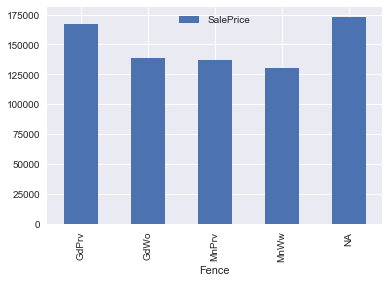

In [167]:
full_df['Fence'] = full_df['Fence'].fillna('NA')
full_df['Fence'] = full_df['Fence'].astype('category')
full_df[['SalePrice','Fence']].groupby(['Fence']).median().plot.bar()
full_df['Fence'].value_counts()

#### 3.1.5 Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [168]:
full_df['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

Fireplaces is complete. Furthermore, number of missing values for FireplaceQu equals the number of houses with 0 fireplaces. We can therefore impute these missing values as No Fireplace

NA    1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: FireplaceQu, dtype: int64

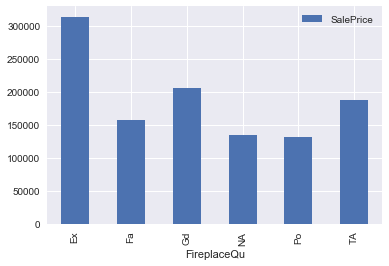

In [169]:
full_df['FireplaceQu'] = full_df['FireplaceQu'].fillna('NA')
full_df[['SalePrice','FireplaceQu']].groupby(['FireplaceQu']).median().plot.bar()
full_df['FireplaceQu'].value_counts()

These do not appear to be ordinal

In [170]:
full_df['FireplaceQu'] = full_df['FireplaceQu'].astype('category')

#### 3.1.6 Lot variables

LotFrontage appears to be not normally distributed, so we should impute with median values  by neighbourhood.

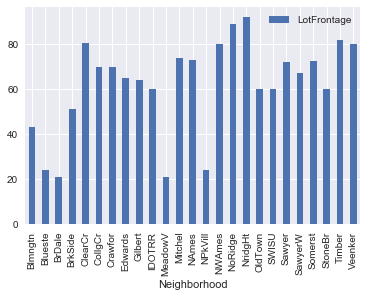

In [171]:
full_df[['Neighborhood','LotFrontage']].groupby(['Neighborhood']).median().plot.bar()

In [172]:
full_df['LotFrontage'] = full_df['LotFrontage'].fillna(full_df.groupby('Neighborhood')['LotFrontage'].transform('median'))

LotShape seems complete and does seem ordinal

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [173]:
map_lotshape = {'IR3':0,'IR2':1,'IR1':2,'Reg':4}
full_df['LotShape'] = full_df['LotShape'].map(map_lotshape)

In [174]:
full_df['LotShape'].value_counts()

4    1859
2     968
1      76
0      16
Name: LotShape, dtype: int64

LotConfig

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

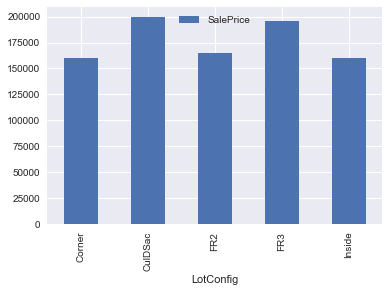

In [176]:
full_df[['SalePrice','LotConfig']].groupby(['LotConfig']).median().plot.bar()

Does not seem to be ordinal, however no missing values

In [177]:
full_df['LotConfig'] = full_df['LotConfig'].astype('category')